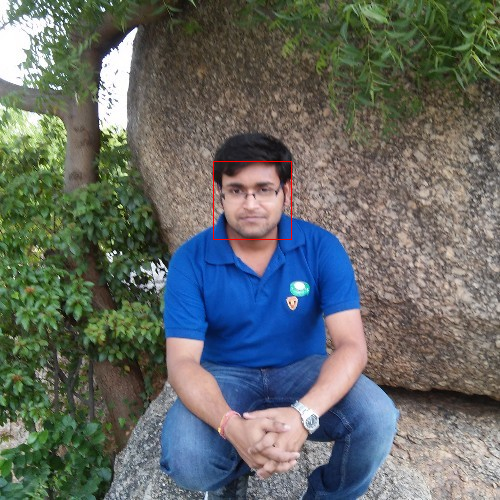

In [1]:
#Using OpenCV cascade classifier
from cv2 import imread
from google.colab.patches import cv2_imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

#loading the first photograph
photo1 = imread('/content/drive/My Drive/photo1.png')

#loading the pre-trained classifier
classifier = CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_default.xml')

#performing Face Detection
bboxes = classifier.detectMultiScale(photo1)

#printing bounding box for each detected face
for box in bboxes:
  #extract
  x, y, width, height = box
  x2, y2 = x+width, y+height

  #drawing a rectangle over the pixels
  rectangle(photo1, (x,y), (x2,y2), (0,0,255), 1)

#displaying the image
cv2_imshow(photo1)

#keeping the window open until we press a key
waitKey(0)

#closing the window
destroyAllWindows()

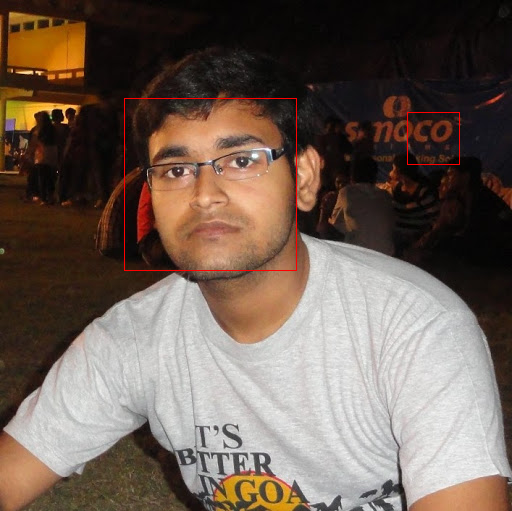

In [2]:
#loading the second photograph
photo1 = imread('/content/drive/My Drive/photo2.jpg')

#loading the pre-trained classifier
classifier = CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_default.xml')

#performing Face Detection
bboxes = classifier.detectMultiScale(photo1)

#printing bounding box for each detected face
for box in bboxes:
  #extract
  x, y, width, height = box
  x2, y2 = x+width, y+height

  #drawing a rectangle over the pixels
  rectangle(photo1, (x,y), (x2,y2), (0,0,255), 1)

#displaying the image
cv2_imshow(photo1)

#keeping the window open until we press a key
waitKey(0)

#closing the window
destroyAllWindows()

Shape of Face1: (224, 224)


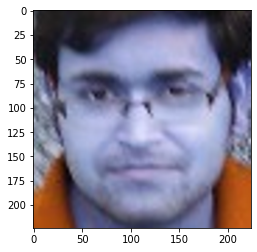

Shape of Face2: (224, 224)
Shape of Face2: (224, 224)


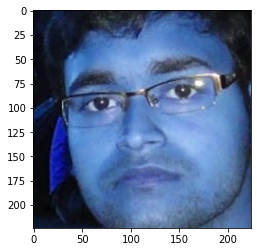

In [4]:
#extracting the face region
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#loading the second photograph
photo1 = imread('/content/drive/My Drive/photo1.png')
photo2 = imread('/content/drive/My Drive/photo2.jpg')
photo4 = imread('/content/drive/My Drive/photo4.jpeg')

#loading the pre-trained classifier
classifier = CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_default.xml')

#performing Face Detection
bboxes1 = classifier.detectMultiScale(photo1)
bboxes2 = classifier.detectMultiScale(photo2)
#bboxes3 = classifier.detectMultiScale(photo3)
#bboxes4 = classifier.detectMultiScale(photo4)

face_images1 = list()
face_images2 = list()
#face_images3 = list()
#face_images4 = list()

#printing bounding box for each detected face in the first photo
for box in bboxes1:
  #extract
  x, y, width, height = box
  x2, y2 = x+width, y+height

  #extracting the face only
  face_boundary = photo1[y:y2, x:x2]
  face_image = Image.fromarray(face_boundary)
  face_image = face_image.resize((224, 224))
  print("Shape of Face1: {}".format(face_image.size))
  face_array = np.asarray(face_image)
  face_images1.append(face_array)

#displaying the extracted face
plt.imshow(face_images1[0])
plt.show()

#printing bounding box for each detected face in the second photo
for box in bboxes2:
  #extract
  x, y, width, height = box
  x2, y2 = x+width, y+height

  #extracting the face only
  face_boundary = photo2[y:y2, x:x2]
  face_image = Image.fromarray(face_boundary)
  face_image = face_image.resize((224, 224))
  print("Shape of Face2: {}".format(face_image.size))
  face_array = np.asarray(face_image)
  face_images2.append(face_array)


#displaying the extracted face
plt.imshow(face_images2[0])
plt.show()

In [5]:
#comparing the extracted faces
import keras
from keras.applications.imagenet_utils import preprocess_input
from scipy.spatial.distance import cosine
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50

#function definition which takes extracted faces as inputs and returns model scores
def get_model_scores(faces):

  #preparing the samples as numpy arrays
  samples = np.asarray(faces, 'float32')
  
  #preparing the data for the model
  samples = preprocess_input(samples)

  #creating a VGGFace model object
  resnet_model = resnet50.ResNet50(weights = 'imagenet')

  #performing the predictions
  return resnet_model.predict(samples)

faces = [face_images1[0], face_images2[0]]
model_scores = get_model_scores(faces)

#checking the similarity between the two faces
print("Cosine Score: {}".format(cosine(model_scores[0], model_scores[1])))
if cosine(model_scores[0], model_scores[1]) >= 0.4:
  print("Both the extracted faces have MATCHED!!!")

else:
  print("Both the extracted faces have NOT MATCHED!!!")

102973440/102967424 [==============================] - 1s 0us/step
Cosine Score: 0.9724114052951336
Both the extracted faces have MATCHED!!!
